# Ferramentas do Projeto

<p>Para analisar a base de dados, podemos utilizar a biblioteca pandas, que se adequa bem ao tipo de análise que desejamos realizar.</p> 

In [1]:
import pandas as pd

# Extracão e Tratamento dos dados

<p>Uma vez importada a biblioteca, utilizamos o comando read_csv(), utilizando o separador apropriado do arquivo csv disponibilizado, para ler os dados e inserí-los num dataframe.</p>

In [2]:
database = pd.read_csv('./DB_Teste.csv', sep=';')
database.head()

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00",NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00",NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86",NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN


<p>Tendo a base de dados em mãos, é preciso realizar um tratamento dos dados recebidos, para garantir que não há problemas com nossos dados, e, caso haja, corrigí-los antes que qualquer análise seja feita.</p>

<p>Primeiramente vamos retirar informacões a respeito do dataframe com a funcão info()</p>

In [3]:
print(database.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    object 
 10  Unnamed: 10                  0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 73.4+ KB
None


<p>Temos uma coluna, a 'Unnamed:10', que não possui nenhum valor não nulo. Podemos retirá-la sem prejuízo à análise.</p>

In [4]:
del database['Unnamed: 10']
database

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00"
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00"
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86"
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00"
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32"
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00"
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00"


<p>Analisando os tipos de dados de cada coluna, vemos que a coluna de valor não tem um tipo numérico de dado. Portanto, precisamos converter esta coluna em uma coluna de floats</p>

In [5]:
database['Valor'] = database['Valor'].replace('[R$.]', '', regex=True).str.replace(',','.').astype(float)
print(database.info())
database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 66.8+ KB
None


,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,273000.00
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,120964.32
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,281880.00
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,720000.00


<p>Por último, devemos checar se não há nenhuma linha duplicada, por precaucão. Podemos inferir, pelo tipo de base de dados que temos, que a única coluna que diferencia as entradas umas das outras é a coluna ID, pois as outras podem possuir mais de uma ocorrência em mais de uma linha sem problemas.</p>

In [6]:
linhas_duplicadas = database.duplicated(subset=['ID'], keep=False) # devolve todas as linhas duplicadas com base na ID
# any(linhas_duplicadas) vai ser true se houver pelo menos uma linha duplicada. 
if any(linhas_duplicadas):
    print(database[linhas_duplicadas])

       Cliente         ID      Tipo Data da Venda  Categoria     Vendedor  \
323  Cliente 3  2021-3656  Produtos    07/04/2021  Upselling  Vendedor 28   
325  Cliente 3  2021-3656  Produtos    23/04/2021  Upselling  Vendedor 28   

    Regional  Duração do Contrato (Meses)  Equipe       Valor  
323   Brasil                           22  Time 1  1305402.59  
325   Brasil                           22  Time 1  1345026.41  


<p>Podemos notar que uma ID foi utilizada em duas entradas da base de dados. Podemos colocá-la numa variavel separada para usar posteriormente em nossas análises, por questões de sanity check.</p>

In [7]:
ID_duplicada = database.loc[linhas_duplicadas, 'ID'].values[0]
print(ID_duplicada)

2021-3656


<p>Agora que temos os dados do jeito que queríamos, podemos partir para a análise</p>

# Análise


### 1) Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor

In [8]:
# Resposta:

# primeiramente criamos a tabela agrupando por vendedor e somando todos os valores de suas vendas
resumo_vendas = database.groupby('Vendedor')['Valor'].sum().reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x) # retirando a notacao cientifica do output, para faciliar a leitura

# em seguida ordenamos a tabela em ordem descrescente
resumo_vendas = resumo_vendas.sort_values(by='Valor', ascending=False)
resumo_vendas = resumo_vendas.rename(columns={'Valor': 'Valor Vendido'})
print(resumo_vendas)

       Vendedor  Valor Vendido
22   Vendedor 3   166220477.72
27   Vendedor 7    57799181.73
1   Vendedor 10    52212055.49
28   Vendedor 8    47274510.01
0    Vendedor 1    30929480.27
29   Vendedor 9    26374558.54
4   Vendedor 13    24837304.87
9   Vendedor 18    22662296.25
21  Vendedor 29    19076866.26
24   Vendedor 4    17346823.03
5   Vendedor 14     7558041.75
12  Vendedor 20     7520906.99
10  Vendedor 19     6513184.00
11   Vendedor 2     5673760.88
7   Vendedor 16     4879238.00
26   Vendedor 6     3548886.69
20  Vendedor 28     3307137.75
3   Vendedor 12     3019669.14
14  Vendedor 22     2150000.00
13  Vendedor 21     1943240.00
15  Vendedor 23     1941880.09
2   Vendedor 11     1221786.61
8   Vendedor 17     1133803.11
25   Vendedor 5      913900.00
16  Vendedor 24      583970.00
23  Vendedor 30      515446.83
19  Vendedor 27      420000.00
18  Vendedor 26      384000.00
6   Vendedor 15       86504.61
17  Vendedor 25       40532.00


### 2) Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor

In [9]:
# podemos encontrar o cliente responsável pela maior venda aplicando loc no valor, filtrando pelo id atribuido ao maior valor e pegando
# o valor contido na coluna cliente. 
cliente_maior_venda = database.loc[database['Valor'].idxmax(), 'Cliente']
print(f"O cliente responsável pela maior venda foi o {cliente_maior_venda}")

# o mesmo raciocínio é válido para a menor venda
cliente_menor_venda = database.loc[database['Valor'].idxmin(), 'Cliente']
print(f"Já o cliente responsável pela menor venda foi o {cliente_menor_venda}")

O cliente responsável pela maior venda foi o Cliente 89
Já o cliente responsável pela menor venda foi o Cliente 120


### 3) Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)

In [10]:
# Agrupando por tipo e aplicando a media obtemos o resultado
valor_medio_tipo = database.groupby('Tipo')['Valor'].mean().reset_index()
valor_medio_tipo['Valor'] = valor_medio_tipo['Valor'].round(2)
valor_medio_tipo = valor_medio_tipo.rename(columns={'Valor': 'Valor Medio por Tipo'})
valor_medio_tipo

,Tipo,Valor Medio por Tipo
0,Licenciamento,983448.77
1,Produtos,893409.19
2,Serviços,314567.94


### 4) Imprima o número de vendas realizada por cliente

In [11]:
# aplicando a funcao value_counts() na coluna Cliente obtemos o número de entradas por cliente
numero_vendas_por_cliente = database['Cliente'].value_counts().reset_index()
numero_vendas_por_cliente.columns = ['Cliente', 'Numero de Vendas']
numero_vendas_por_cliente

,Cliente,Numero de Vendas
0,Cliente 5,128
1,Cliente 8,61
2,Cliente 4,60
3,Cliente 10,43
4,Cliente 3,31
...,...,...
152,Cliente 146,1
153,Cliente 144,1
154,Cliente 143,1
155,Cliente 142,1


# GRÁFICO DA PARTE 2 DO DESAFIO

In [20]:
import matplotlib.pyplot as plt

<p></p>

In [13]:
database['Data da Venda'] = pd.to_datetime(database['Data da Venda'], format='%d/%m/%Y')
database['Trimestre'] = database['Data da Venda'].dt.to_period('Q') # 'Q' define um trimestre (quarto de ano)

In [14]:
database.head()

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Trimestre
0,Cliente 1,2017-0022,Serviços,2018-01-02,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00,2018Q1
1,Cliente 10,2018-0088,Serviços,2018-02-14,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00,2018Q1
2,Cliente 10,2018-0104,Serviços,2018-03-13,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86,2018Q1
3,Cliente 10,2018-0168,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86,2018Q2
4,Cliente 10,2018-0169,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86,2018Q2


In [22]:
soma_por_trimestre = database.groupby('Trimestre')['Valor'].sum().reset_index()
soma_por_trimestre['Trimestre'] = soma_por_trimestre['Trimestre'].astype(str) # convertendo para string para evitar erros com o plot
print(soma_por_trimestre)

   Trimestre       Valor
0     2018Q1  9214708.51
1     2018Q2 24329411.79
2     2018Q3 17807820.99
3     2018Q4 28684705.77
4     2019Q1 14924051.07
5     2019Q2 48639438.83
6     2019Q3 35105020.45
7     2019Q4 41333096.43
8     2020Q1 72307629.80
9     2020Q2 49069698.10
10    2020Q3 52073231.25
11    2020Q4 43522269.02
12    2021Q1 47535693.63
13    2021Q2 33542666.98


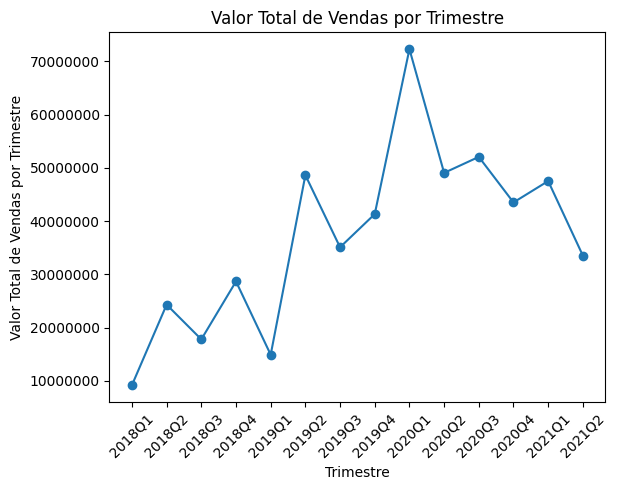

In [25]:
plt.plot(soma_por_trimestre['Trimestre'], soma_por_trimestre['Valor'], marker='o')
plt.title('Valor Total de Vendas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Valor Total de Vendas por Trimestre')
plt.ticklabel_format(style='plain', axis='y') # retirando a notacao cientifica do eixo y para melhor legibilidade
plt.xticks(rotation=45) # rotacionanco os valores no eixo x para melhor legibilidade
plt.show()